In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
import os

In [59]:
os.chdir('C:\\Users\\aravi\Downloads')

# Loading the Train file

In [60]:
train_df = pd.read_csv('train_ctrUa4K.csv')

In [61]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [62]:
#dimension of dataset
train_df.shape

(614, 13)

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [64]:
#columns name

train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [65]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Visualisation

<Axes: xlabel='Credit_History', ylabel='count'>

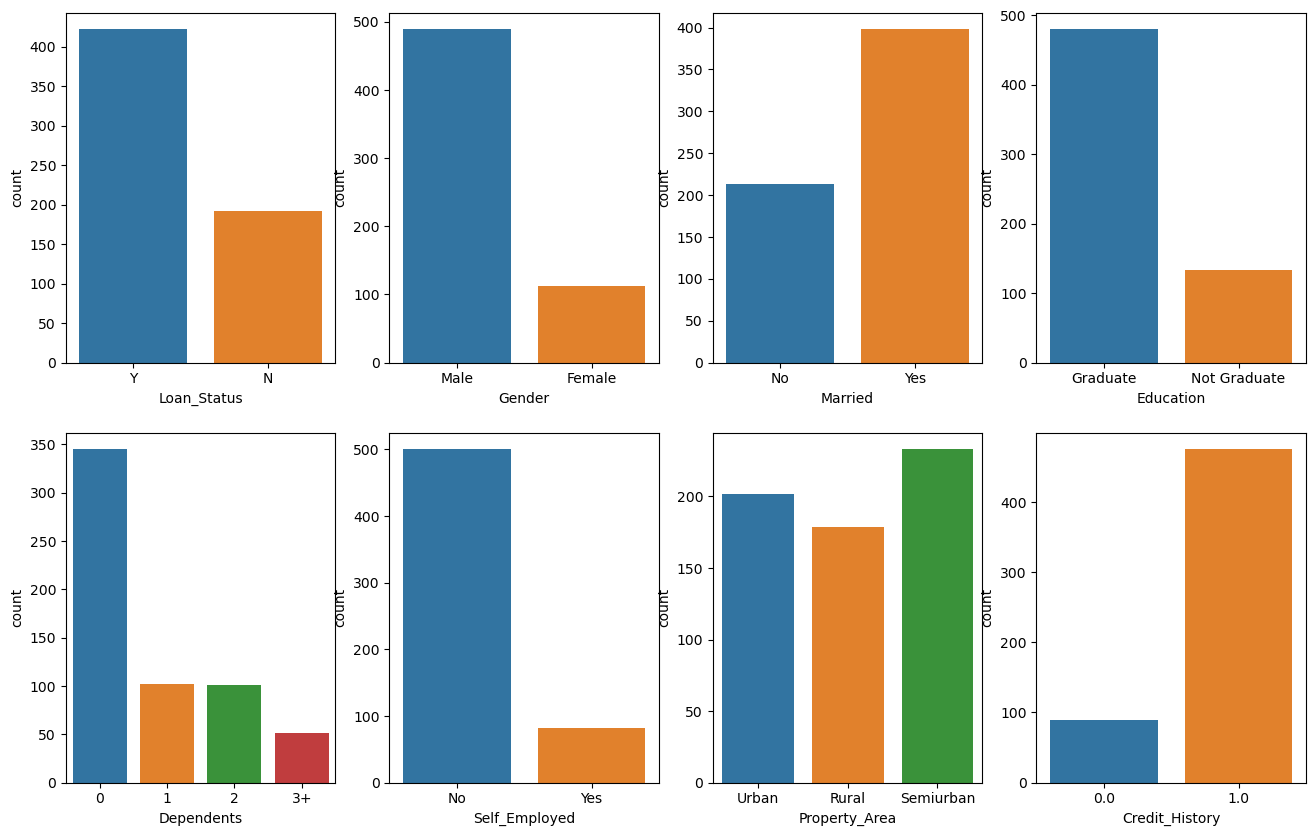

In [66]:
#visualisation the data

fig, ax = plt.subplots(2,4, figsize=(16,10))

sns.countplot(x='Loan_Status', data = train_df, ax=ax[0][0])
sns.countplot(x='Gender', data=train_df, ax=ax[0][1])
sns.countplot(x='Married', data=train_df, ax=ax[0][2])
sns.countplot(x='Education', data=train_df, ax=ax[0][3])
sns.countplot(x='Dependents', data=train_df, ax=ax[1][0])
sns.countplot(x='Self_Employed', data=train_df, ax=ax[1][1])
sns.countplot(x='Property_Area', data=train_df, ax=ax[1][2])
sns.countplot(x='Credit_History', data=train_df, ax=ax[1][3])


# Pre-processing

In [67]:
#checking for null values

train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
#using mean to fill numerical terms

train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].mean())

In [69]:
#using mode to fill categorical terms

train_df['Gender'] = train_df["Gender"].fillna(train_df['Gender'].mode()[0])
train_df['Married'] = train_df["Married"].fillna(train_df['Married'].mode()[0])
train_df['Dependents'] = train_df["Dependents"].fillna(train_df['Dependents'].mode()[0])
train_df['Self_Employed'] = train_df["Self_Employed"].fillna(train_df['Self_Employed'].mode()[0])


In [71]:
#since loan id is A UNIQUE feature , it will not affeect the dataset much so removing loan id 

train_df = train_df.drop('Loan_ID',axis=1)

In [72]:
train_df.isna().sum()   #no missing values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    train_df[col] = le.fit_transform(train_df[col])

In [75]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Loading the test file

In [76]:
test_df = pd.read_csv('test_lAUu6dG.csv')

In [77]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# EDA-Testfile

In [78]:
#dimension of dataset
test_df.shape

(367, 12)

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [80]:
#columns name

test_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [81]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


<Axes: xlabel='Credit_History', ylabel='count'>

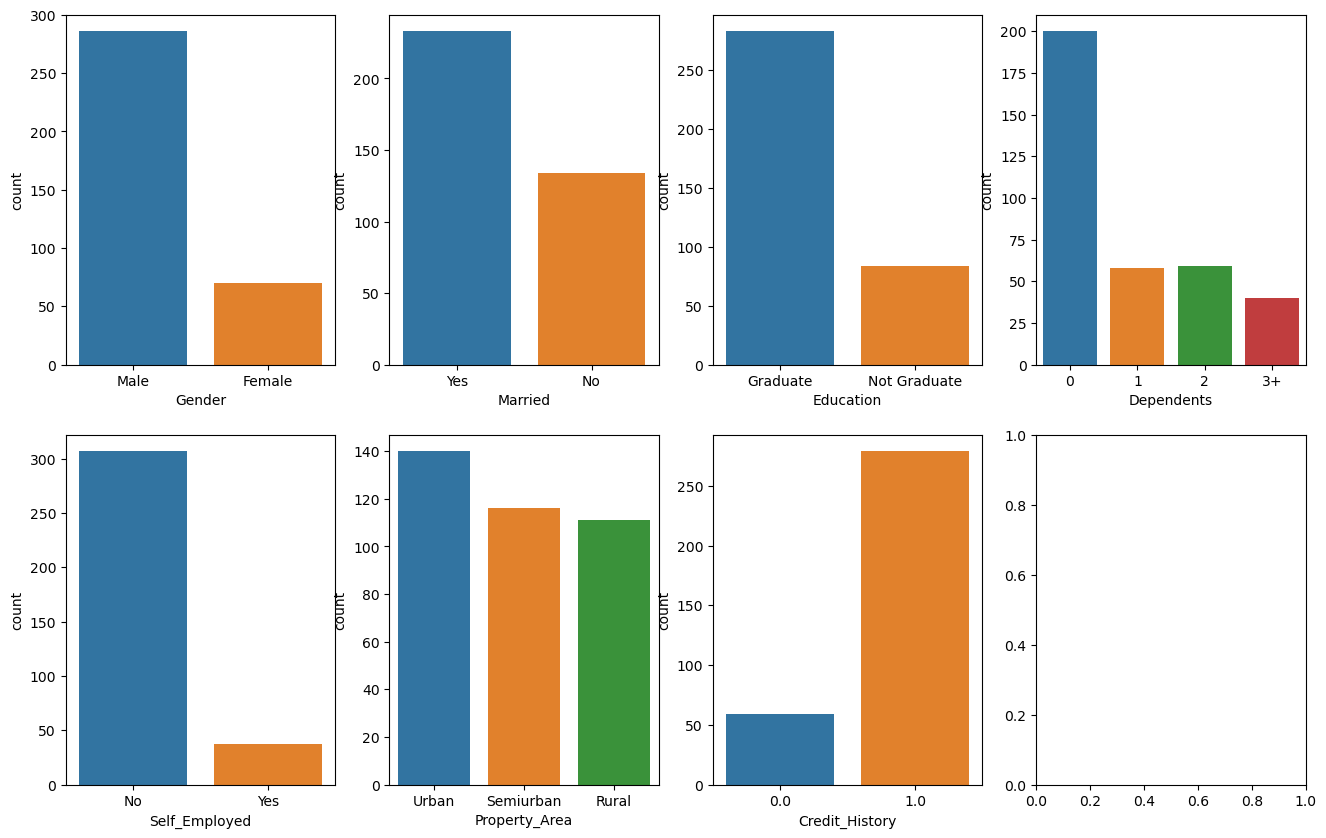

In [82]:
#visualisation the data

fig, ax = plt.subplots(2,4, figsize=(16,10))
sns.countplot(x='Gender', data=test_df, ax=ax[0][0])
sns.countplot(x='Married', data=test_df, ax=ax[0][1])
sns.countplot(x='Education', data=test_df, ax=ax[0][2])
sns.countplot(x='Dependents', data=test_df, ax=ax[0][3])
sns.countplot(x='Self_Employed', data=test_df, ax=ax[1][0])
sns.countplot(x='Property_Area', data=test_df, ax=ax[1][1])
sns.countplot(x='Credit_History', data=test_df, ax=ax[1][2])


# Pre processsing

In [83]:
#checking for null values

test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [84]:
#using mode to fill categorical terms

test_df['Gender']=test_df['Gender'].fillna(test_df['Gender'].mode()[0])
test_df['Dependents']=test_df['Dependents'].fillna(test_df['Dependents'].mode()[0])
test_df['Self_Employed']=test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0])
test_df['Loan_Amount_Term']=test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0])
test_df['Credit_History']=test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0])

In [85]:
test_df['LoanAmount']=test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean())

In [86]:
test_df.isna().sum()    #no missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Label Encoding

In [87]:
from sklearn.preprocessing import LabelEncoder
cols = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area",]
le = LabelEncoder()
for col in cols:
    test_df[col] = le.fit_transform(test_df[col])

In [88]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [94]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [90]:
#spliting into dependant and independant

x = train_df.drop('Loan_Status',axis=1)
y = train_df['Loan_Status']

In [91]:
#standard scaling on the feature set

from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x=std_scaler.fit_transform(x)
x=pd.DataFrame(x)

In [93]:
#splitting dataset into train and test   train=20%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)


# Logistic regression

In [95]:
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(x_train,y_train)

In [96]:
lr_pred=lr_model.predict(x_test)

In [103]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test, lr_pred))


0.7886178861788617


the accuracy score for logistic regression is 78%

# predicting the test dataset

In [104]:
test=test_df.drop('Loan_ID',axis=1)

In [105]:
test_scaled=std_scaler.fit_transform(test)
test_scaled=pd.DataFrame(test_scaled)

In [106]:
logreg_prediction=lr_model.predict(test_scaled)
logreg_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [109]:
#loading onto sample submission file

submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [110]:
#Replace the ‘Loan_Status’ column with the prediction values

submission['Loan_Status']=logreg_prediction
submission['Loan_ID']=test_df['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [113]:
#replacing 0 & 1 to Y/N

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission.tail()

,Loan_ID,Loan_Status
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


In [114]:

pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv("sample_submission_49d68Cx.csv",index=False)


# SVM

In [116]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='rbf')
svm_cls=svm_cls.fit(x_train,y_train)

In [117]:
y_pred_svm=svm_cls.predict(x_test)

In [118]:
print(accuracy_score(y_test, y_pred_svm))

0.7886178861788617


the accuracy score is 78%

In [120]:
svm_prediction=svm_cls.predict(test_scaled)
svm_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [121]:
#loading onto sample submission file

submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [123]:
submission['Loan_Status']=svm_prediction
submission['Loan_ID']=test_df['Loan_ID']
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [125]:
#replacing 0 & 1 to Y/N

submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission.tail()

,Loan_ID,Loan_Status
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


In [127]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv("sample_submission_49d68Cx.csv",index=False)

# Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(x_train,y_train)

In [129]:
y_pred_dt=dt_model.predict(x_test)

In [130]:
print(accuracy_score(y_test, y_pred_dt))

0.7073170731707317


 since the accuracy score is close to only 70% , not considering this model